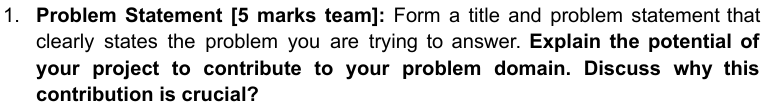

<br> The time and cost going into making video games is really high. During the beginning stage of the video game production cycle, if we are able to determine how the video game could potentially be received by observing previous releases of similar video games, it would help in altering ideas for the development team. We will be taking into consideration the scores, tags, genres, release time, etc of the games in dataset to help come to a conclusion about how the hypothesised game will be received. The idea also involves analysis of synopsis of the test game with similar games to see how it could possibly be received but it will be developed down the line.

<br> Datasets obtained from https://www.kaggle.com/datasets/nikdavis/steam-store-raw

Kindly extract the files steam_app_data.csv and steamspy_data.csv from archive.zip for to load here

In [1]:
from ast import literal_eval
import itertools
import time
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=100

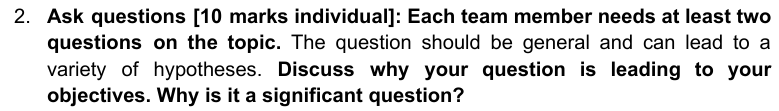

<br>A]
<br>**Kisore Senthilkumar(50610194):**
<br>What kind of genres are the most popular?
<br>Are there more games aimed towards kids or older people?
<br>These questions will lead us to finding how a hypothesised game with specific genres and age ratings would perform

<br>**Harshitha Itta(50605000):**
<br>What is the relationship between the average game score and the price of the game?

<br>This question investigates whether higher-quality games, as measured by their scores, are also priced higher. Understanding this relationship helps to determine whether game developers and publishers follow a quality-based pricing strategy or if the pricing is independent of game reviews.

<br>Question:
How do different game publishers impact the overall score of their games?

<br>Why it’s significant:
<br>This question helps explore whether well-known, established publishers consistently produce higher-scoring games compared to smaller or indie publishers. Understanding this relationship can provide insights into how publisher reputation, resources, and specialization influence player reception, which is crucial for developers when deciding on partnerships or publishing strategies.

<br>**Shashank Govindu(50594030):**
<br> Q1]What is the relationship between the length of the "detailed_description" and the "score" of the game?
<br> This question examines whether longer game descriptions correlate with higher review scores and can reveal how effectively developers communicate their game's value to players.

<br> Q2]How do the "categories" affect the "score" of a game?
<br> This question explores how the gameplay modes specified in the "categories" column (such as multiplayer, singleplayer) impact review scores, uncovering trends in player preferences and satisfaction with different modes.

<br>**Neeraj Gummadi(50594025):**
<br> Q1]Is there a significant difference in “score” between free games and paid games as indicated by the “price”?
<br>This question explores whether free-to-play games are rated differently from paid games based on “score,” which can help developers understand how pricing impacts user satisfaction. By analyzing this, developers can refine pricing strategies to balance profitability with positive reception, aligning with your objective of predicting game success.

<br> Q2]Do games with more “supported_languages” tend to receive higher “scores”?
<br>This question examines if games with more language options receive higher review scores, reflecting broader accessibility and appeal. It aligns with our goal of predicting game reception by showing how localization can drive positive feedback, helping developers prioritize language support for global success.





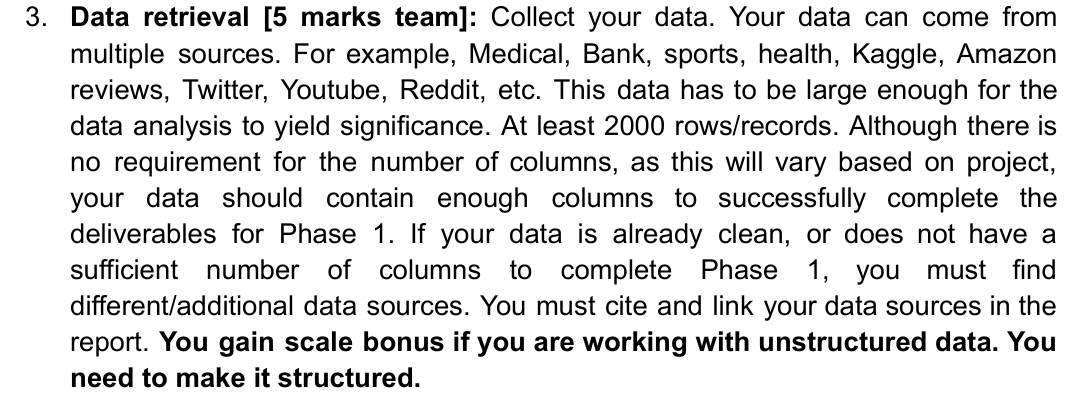

<br> A]
<br> Data is retrieved from https://store.steampowered.com/ and the required data is converted into the csv files bearing 2000+ records and loaded as follows :

In [2]:
df = pd.read_csv('steam_app_data.csv', engine='python', encoding='utf-8')
df_ss=pd.read_csv('steamspy_data.csv', engine='python', encoding='utf-8')
# print out number of rows and columns
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])
print('Rows:', df_ss.shape[0])
print('Columns:', df_ss.shape[1])
#viewing the data
df.head(10)

Rows: 29235
Columns: 39
Rows: 29235
Columns: 20


,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,"English<strong>*</strong>, French<strong>*</st...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'GBP', 'initial': 719, 'final': 7...",[7],"[{'name': 'default', 'title': 'Buy Counter-Str...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 65735},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,"English, French, German, Italian, Spanish - Sp...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'GBP', 'initial': 399, 'final': 3...",[29],"[{'name': 'default', 'title': 'Buy Team Fortre...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 2802},{'total': 0},"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/20/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,"English, French, German, Italian, Spanish - Spain",https://steamcdn-a.akamaihd.net/steam/apps/30/...,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'GBP', 'initial': 399, 'final': 3...",[30],"[{'name': 'default', 'title': 'Buy Day of Defe...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 1992},{'total': 0},"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/30/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,"English, French, German, Italian, Spanish - Sp...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</s

In [3]:
column_names = df.columns
column_names

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'fullgame', 'supported_languages', 'header_image',
       'website', 'pc_requirements', 'mac_requirements', 'linux_requirements',
       'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers',
       'publishers', 'demos', 'price_overview', 'packages', 'package_groups',
       'platforms', 'metacritic', 'reviews', 'categories', 'genres',
       'screenshots', 'movies', 'recommendations', 'achievements',
       'release_date', 'support_info', 'background', 'content_descriptors'],
      dtype='object')

In [4]:
#printing the whole dataset to analyze the data present
df

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,"English<strong>*</strong>, French<strong>*</st...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'GBP', 'initial': 719, 'final': 7...",[7],"[{'name': 'default', 'title': 'Buy Counter-Str...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 65735},{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,"English, French, German, Italian, Spanish - Sp...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'GBP', 'initial': 399, 'final': 3...",[29],"[{'name': 'default', 'title': 'Buy Team Fortre...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 2802},{'total': 0},"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/20/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,"English, French, German, Italian, Spanish - Spain",https://steamcdn-a.akamaihd.net/steam/apps/30/...,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'GBP', 'initial': 399, 'final': 3...",[30],"[{'name': 'default', 'title': 'Buy Day of Defe...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...",NaN,{'total': 1992},{'total': 0},"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://steamcdn-a.akamaihd.net/steam/apps/30/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,"English, French, German, Italian, Spanish - Sp...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</s

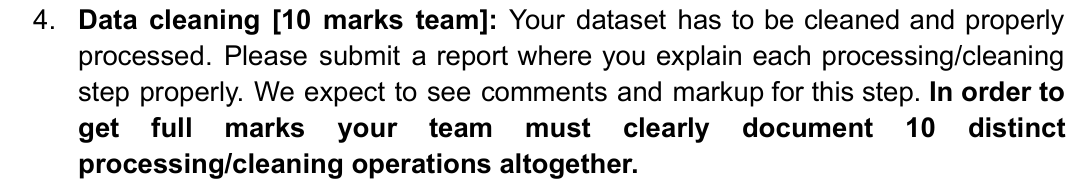

###A]
<br> List of cleaning steps performed are as follows:


1.   Removing duplicate records.
2.   Standardizing Column Names
3.   Removing Null Values
4.   Discarding unwanted columns
5.   Replacing irrelevant data with 0 like price
6.   Converted the column 'required_age' from float to int.
7.   Retrieved Price and Currency from price_overview and filled null values with appropriated price of 0 if the game was free
8.   Cleaned up the genres and categories Columns by removing unnecessary noise in it
9.   Checked for outliers and corrected the values
10.  





### 1] Initially, discarding duplicate records.

In [5]:
df.drop_duplicates(inplace=True)

###2] Standardizing Column Names as Consistent column names make data manipulation easier and prevent errors in code.

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

###Utilizing the steamspy dataset to obtain scores for the games as the steam_app dataset had a lot of null values on reviews

In [7]:
df['score']=df_ss['positive']-df_ss['negative']

### As there are a lot of column values in this dataset that we wont be using for our problem. So the unnecessary columns are to be removed. Before that we will have to analyze the null values and remove the null value rows that don't contribute to the analysis.

In [8]:
df.isnull().sum()
nc=df.isnull().sum()

In [9]:
df = df.dropna(subset=["type"])
df.isnull().sum()


,0
type,0
name,1
steam_appid,0
required_age,0
is_free,0
controller_support,23081
dlc,24104
detailed_description,26
about_the_game,26
short_description,26


### Now we have the 149 row values that contributed nothing to our dataset removed and its cleaner. We can check if the remaining type rows have a none string left

In [10]:
df[df['type']=='none']

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors,score


### There are no such rows left so we can move to the next step. Our next important column is name. A row with name that is none or having a null value will not  be useful

In [11]:
temp_names=df[(df['name']=='none') | (df['name'].isnull())]
temp_names

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors,score
4918,game,none,339860,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,English<strong>*</strong><br><strong>*</strong...,https://steamcdn-a.akamaihd.net/steam/apps/339...,NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],NaN,NaN,NaN,NaN,[''],NaN,NaN,NaN,[],"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...",NaN,NaN,NaN,"{'total': 3, 'highlighted': [{'name': 'Master ...","{'coming_soon': False, 'date': '27 Feb, 2015'}","{'url': '', 'email': ''}",NaN,"{'ids': [], 'notes': None}",52
6779,game,none,385020,0.0,False,NaN,NaN,- discontinued - (please remove),- discontinued - (please remove),- discontinued - (please remove),NaN,"English, French, Italian, German, Spanish - Sp...",https://steamcdn-a.akamaihd.net/steam/apps/385...,NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,NaN,NaN,NaN,['none'],[''],NaN,NaN,NaN,[],"{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '4', 'description': 'Casual'}, {'id': ...",NaN,NaN,NaN,{'total': 0},"{'coming_soon': False, 'date': '4 Nov, 2015'}","{'url': '', 'email': ''}",NaN,"{'ids': [], 'notes': None}",-12
7235,game,NaN,396420,0.0,True,NaN,NaN,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。<b...,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。<b...,Spookeningは3Dの恐怖ゲームで、あなたは毎夜に死んでゴーストとして復活します。 村...,NaN,NaN,https://steamcdn-a.akamaihd.net/steam/apps/396...,NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],NaN,NaN,NaN,NaN,[''],NaN,NaN,NaN,[],"{'windows': True, 'mac': False, 'linux': False}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'total': 0},"{'coming_soon': False, 'date': '1 Nov, 2016'}","{'url': '', 'email': ''}",NaN,"{'ids': [], 'notes': None}",13
7350,game,none,398970,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,English<strong>*</strong><br><strong>*</strong...,https://steamcdn-a.akamaihd.net/steam/apps/398...,NaN,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,NaN,NaN,NaN,['none'],['none'],"[{'appid': 516340, 'description': ''}]",NaN,NaN,[],"{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...",NaN,NaN,NaN,"{'total': 35, 'highlighted': [{'name': ""They'v...","{'coming_soon': False, 'date': '5 Nov, 2015'}","{'url': '', 'email': ''}",NaN,"{'ids': [], 'notes': None}",-11


In [12]:
df.dropna(subset='name')
df=df[df['name']!='none']
df[df['name']=='none']

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors,score


### Now we cleaned out the name column and have obtained ourselves a dataset with relevant names. Now we will have to analyze null values in columns and remove the columns that have excessive null values

In [13]:
columns_to_drop=df.columns[nc>5000]
df=df.drop(columns_to_drop,axis=1)

## To check if the columns were removed.

In [14]:
df.isnull().sum()

,0
type,0
name,1
steam_appid,0
required_age,0
is_free,0
detailed_description,24
about_the_game,24
short_description,24
supported_languages,14
header_image,0


### 6] Verifying if outliers are present and found 'required_ge' column is in float which is not as expected converted the data type into int.

In [15]:
# Check for missing values
print(df['required_age'].isnull().sum())

#Fill missing values with a default 0
df['required_age'].fillna(0, inplace=True)

# Convert 'required_age' to integer type
df['required_age'] = df['required_age'].astype(int)

# Check the result
print(df['required_age'].dtype)  # Should show 'int64' now

df['required_age'].value_counts()

0
int64


<ipython-input-15-82bb8f8b6a39>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['required_age'].fillna(0, inplace=True)


,count
required_age,
0,28432
18,288
16,141
12,72
17,47
15,39
13,21
3,10
7,8


### 0 value is acceptable for age as it would mean there is no age restriction on that game. There is just one game with the value being 1818 which is an outlier here. Let us probe more into what values are present in it in the other columns and correct it if necessary as this could be an instance where the age 18 got repeated twice as '1818'

In [16]:
df[df['required_age']==1818]

#as it does have content we will just modify it to be of 18

df.loc[df["required_age"] == 1818, "required_age"] = 18

df[df['name']=='Симулятор Сидения у Подъезда']

,type,name,steam_appid,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,header_image,pc_requirements,mac_requirements,linux_requirements,developers,publishers,price_overview,packages,package_groups,platforms,categories,genres,screenshots,movies,achievements,release_date,support_info,background,content_descriptors,score
28848,game,Симулятор Сидения у Подъезда,1031920,18,False,"<h2 class=""bb_tag"">Симулятор Сидения у Подъезд...","<h2 class=""bb_tag"">Симулятор Сидения у Подъезд...",Гыгы,Russian<strong>*</strong><br><strong>*</strong...,https://steamcdn-a.akamaihd.net/steam/apps/103...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,['Kavkaz Sila Games'],['Kavkaz Sila Games'],"{'currency': 'GBP', 'initial': 79, 'final': 47...",[343286],"[{'name': 'default', 'title': 'Buy Симулятор С...","{'windows': True, 'mac': False, 'linux': False}","[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '28', 'description': 'Simulation'}]","[{'id': 0, 'path_thumbnail': 'https://steamcdn...","[{'id': 256749019, 'name': '2', 'thumbnail': '...","{'total': 1, 'highlighted': [{'name': 'Kavkaz ...","{'coming_soon': False, 'date': '25 Apr, 2019'}","{'url': '', 'email': 'hikkasimulator@gmail.com'}",https://steamcdn-a.akamaihd.net/steam/apps/103...,"{'ids': [5], 'notes': 'Мат, жизнь в СНГ'}",7


### We can now proceed to identify more unwanted columns and remove them. Columns such as packages, package_groups, screenshots, movies, achievements, support_info and background wouldnt contribute to the analysis as they exist mostly for purchasing side and flair. We can drop them as well

In [17]:
columns_to_drop=['header_image','packages', 'package_groups','screenshots', 'movies', 'achievements','support_info', 'background']
df=df.drop(columns_to_drop,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29076 entries, 0 to 29234
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  29076 non-null  object
 1   name                  29075 non-null  object
 2   steam_appid           29076 non-null  int64 
 3   required_age          29076 non-null  int64 
 4   is_free               29076 non-null  object
 5   detailed_description  29052 non-null  object
 6   about_the_game        29052 non-null  object
 7   short_description     29052 non-null  object
 8   supported_languages   29062 non-null  object
 9   pc_requirements       29076 non-null  object
 10  mac_requirements      29076 non-null  object
 11  linux_requirements    29076 non-null  object
 12  developers            28962 non-null  object
 13  publishers            29076 non-null  object
 14  price_overview        25516 non-null  object
 15  platforms             29076 non-null  obj

### Now we have to look at the price_overview column.The price is stored in a format where the currency is mentioned with a final discount price. We could aim to split it into two columns where one denotes the currency and the other denotes the value. We are also setting the value of price to be -1 for the games with null value

In [18]:
def split_price(x):
  if x is not np.nan:
    return literal_eval(x)
  else:
    return {'currency': 'GBP', 'initial': -1}

df['price_overview'] = df['price_overview'].apply(split_price)
df['currency'] = df['price_overview'].apply(lambda x: x['currency'])
df['price'] = df['price_overview'].apply(lambda x: x['initial'])

In [19]:
df.head(3)

,type,name,steam_appid,required_age,is_free,detailed_description,about_the_game,short_description,supported_languages,pc_requirements,mac_requirements,linux_requirements,developers,publishers,price_overview,platforms,categories,genres,release_date,content_descriptors,score,currency,price
0,game,Counter-Strike,10,0,False,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,"English<strong>*</strong>, French<strong>*</st...",{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'GBP', 'initial': 719, 'final': 7...","{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Nov, 2000'}","{'ids': [2, 5], 'notes': 'Includes intense vio...",121195,GBP,719
1,game,Team Fortress Classic,20,0,False,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,"English, French, German, Italian, Spanish - Sp...",{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'GBP', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 Apr, 1999'}","{'ids': [2, 5], 'notes': 'Includes intense vio...",2685,GBP,399
2,game,Day of Defeat,30,0,False,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,"English, French, German, Italian, Spanish - Spain",{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'currency': 'GBP', 'initial': 399, 'final': 3...","{'windows': True, 'mac': True, 'linux': True}","[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","{'coming_soon': False, 'date': '1 May, 2003'}","{'ids': [], 'notes': None}",3018,GBP,399


### Now its time to look at 2 interconnected columns that is_free and the price.  While analyzing we also found out there is an overlap between the two columns where is_free was True and the price was -1. So lets change the price of free games to be 0

In [20]:
df.loc[df['is_free'], 'price'] = 0

### Now we can proceed to remove the unwanted columns such as price_overview and is_free as we  have the condensed data inside price and currency

In [21]:
df = df.drop(['is_free', 'price_overview'], axis=1)

## Now we can move onto cleaning up categories and genres as that would give us valuable data for our main goal. First off we should remove the rows with null values in genre and categories

In [22]:
df=df.dropna(subset='genres')
df=df.dropna(subset='categories')

### Now we can extract the description from genres and categories and clean up those columns. We can use literal_eval like we used it to extract the price and currency

In [23]:
for desc in ['genres']:
        df[desc] = df[desc].apply(lambda x: ';'.join(category['description'] for category in literal_eval(x)))

for desc in ['categories']:
        df[desc] = df[desc].apply(lambda x: ';'.join(category['description'] for category in literal_eval(x)))

### Now we have a mostly cleaned up dataset to do operations with and if further cleaning is needed it will be performed based on needs

In [24]:
df

,type,name,steam_appid,required_age,detailed_description,about_the_game,short_description,supported_languages,pc_requirements,mac_requirements,linux_requirements,developers,publishers,platforms,categories,genres,release_date,content_descriptors,score,currency,price
0,game,Counter-Strike,10,0,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,"English<strong>*</strong>, French<strong>*</st...",{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}",Multi-player;Online Multi-Player;Local Multi-P...,Action,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'ids': [2, 5], 'notes': 'Includes intense vio...",121195,GBP,719
1,game,Team Fortress Classic,20,0,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,"English, French, German, Italian, Spanish - Sp...",{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}",Multi-player;Online Multi-Player;Local Multi-P...,Action,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'ids': [2, 5], 'notes': 'Includes intense vio...",2685,GBP,399
2,game,Day of Defeat,30,0,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,"English, French, German, Italian, Spanish - Spain",{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}",Multi-player;Valve Anti-Cheat enabled,Action,"{'coming_soon': False, 'date': '1 May, 2003'}","{'ids': [], 'notes': None}",3018,GBP,399
3,game,Deathmatch Classic,40,0,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,"English, French, German, Italian, Spanish - Sp...",{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}",Multi-player;Online Multi-Player;Local Multi-P...,Action,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'ids': [], 'notes': None}",1006,GBP,399
4,game,Half-Life: Opposing Force,50,0,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,"English, French, German, Korean",{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Gearbox Software'],['Valve'],"{'windows': True, 'mac': True, 'linux': True}",Single-player;Multi-player;Valve Anti-Cheat en...,Action,"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'ids': [], 'notes': None}",4962,GBP,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,game,Room of Pandora,1065230,0,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",The Room of Pandora is a third-person interact...,"English, Japanese, Simplified Chinese, Traditi...",{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],['SHEN JIAWEI'],['SHEN JIAWEI'],"{'windows': True, 'mac': False, 'linux': False}",Single-player;Steam Achievements,Adventure;Casual;Indie,"{'coming_soon': False, 'date': '24 Apr, 2019'}","{'ids': [], 'notes': None}",3,GBP,209
29231,game,Cyber Gun,1065570,0,Have you ever been so lonely that no one but y...,Have you ever

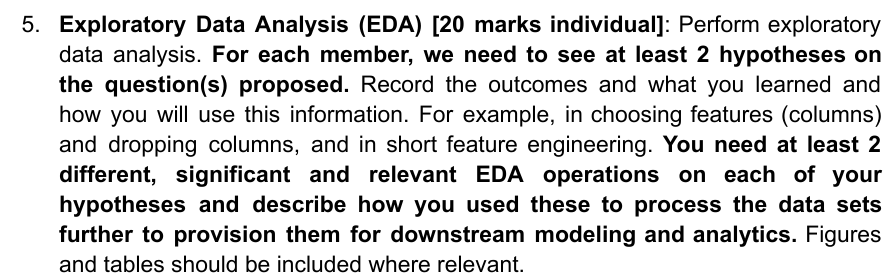

##Kisore Senthilkumar(50610194)
We will try to see what genres are the most popular by taking the count of games per genre. Then we can look at the top 10 user rated games and look what genre they belong to come to an idea

In [25]:
df['genres'].value_counts()


,count
genres,
Action;Indie,1949
Casual;Indie,1554
Action;Adventure;Indie,1294
Adventure;Indie,1215
Action;Casual;Indie,1056
...,...
Violent;Simulation,1
Violent;Action;Adventure;Casual;Indie;RPG;Simulation;Strategy,1
Action;Adventure;Indie;Simulation;Sports;Early Access,1


In [26]:
eda_df=df
eda_df.sort_values("score", ascending=False,inplace=True)
eda_df[['name', 'genres']].head(10)

,name,genres
25,Counter-Strike: Global Offensive,Action;Free to Play
22,Dota 2,Action;Free to Play;Strategy
19,Team Fortress 2,Action;Free to Play
142,Garry's Mod,Indie;Simulation
3773,Unturned,Action;Adventure;Casual;Free to Play;Indie
1693,PAYDAY 2,Action;RPG
1298,Terraria,Action;Adventure;Indie;RPG
21,Left 4 Dead 2,Action
1186,The Elder Scrolls V: Skyrim,RPG
2355,Rocket League®,Action;Indie;Racing;Sports


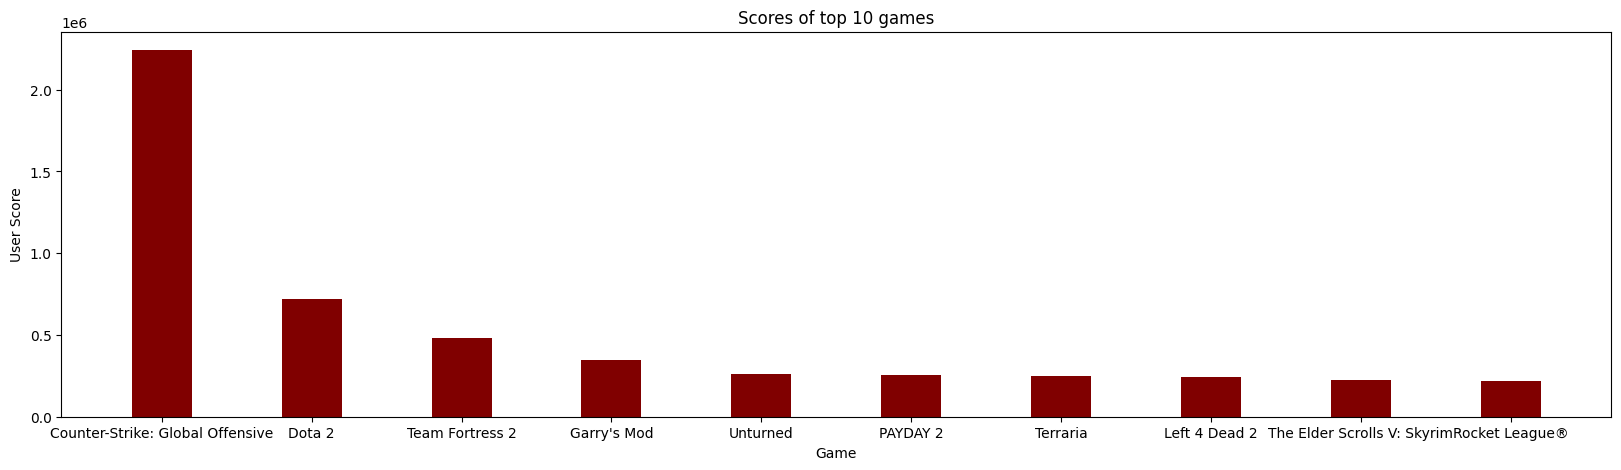

In [27]:
fig = plt.figure(figsize = (20, 5))
plt.bar(eda_df['name'].head(10), eda_df['score'].head(10), color ='maroon',
        width = 0.4)

plt.xlabel("Game")
plt.ylabel("User Score")
plt.title("Scores of top 10 games")
plt.show()

This shows the top games are mostly Action games so ideally for the game to have best outcome it should be an action game

We can now try to see the target audience for the games that have been published and how many targeted different age groups

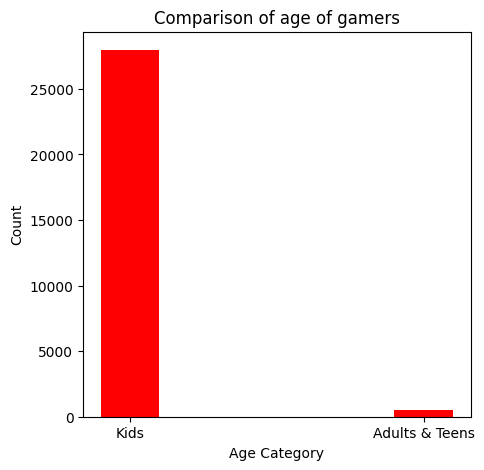

In [28]:
eda_df=df
def age_select(x):
  if x<=13:
    return "Kids"
  else:
    return "Adults & Teens"
eda_df['age_category']=eda_df['required_age'].apply(age_select)


eda_df2 = eda_df['age_category'].value_counts().rename_axis('age_category').reset_index(name='counts')
fig = plt.figure(figsize = (5,5))
plt.bar(eda_df2['age_category'], eda_df2['counts'], color ='red', width=0.2)

plt.xlabel("Age Category")
plt.ylabel("Count")
plt.title("Comparison of age of gamers")
plt.show()

**Harshitha Itta(50605000):**
Q1] How does the release date of a game affect its score?

This shows that most games are targeted at kids as opposed to older people so the game needs to be potentially for kids to get the best outcome

In [29]:
# Check column names in the dataframe
print(df.columns)


Index(['type', 'name', 'steam_appid', 'required_age', 'detailed_description',
       'about_the_game', 'short_description', 'supported_languages',
       'pc_requirements', 'mac_requirements', 'linux_requirements',
       'developers', 'publishers', 'platforms', 'categories', 'genres',
       'release_date', 'content_descriptors', 'score', 'currency', 'price',
       'age_category'],
      dtype='object')


<ipython-input-30-18f1610c7328>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['score'] = pd.to_numeric(df_cleaned['score'], errors='coerce')
<ipython-input-30-18f1610c7328>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='developers', data=top_developers, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd

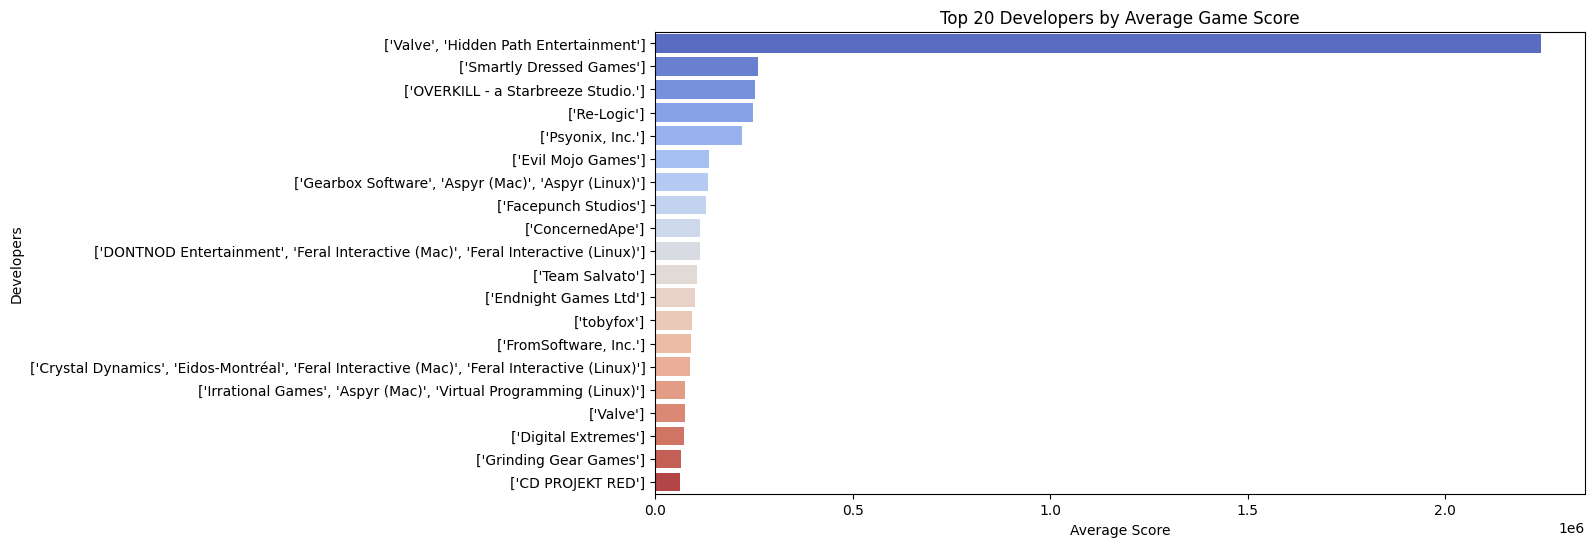

In [30]:
# Step 1: Data Cleaning

# Remove rows where 'developers' or 'score' is missing
df_cleaned = df.dropna(subset=['developers', 'score'])

# Convert 'score' to numeric (in case there are non-numeric values)
df_cleaned['score'] = pd.to_numeric(df_cleaned['score'], errors='coerce')

# Remove rows where 'score' couldn't be converted to a numeric value (i.e., NaN values)
df_cleaned = df_cleaned.dropna(subset=['score'])

# Remove any duplicate entries in the DataFrame to avoid over-representation of certain developers
df_cleaned = df_cleaned.drop_duplicates()

# Ensure 'developers' are stripped of any extra spaces or formatting issues
df_cleaned['developers'] = df_cleaned['developers'].str.strip()

# Step 2: Data Preprocessing

# Group by 'developers' and calculate the average score for each developer
developer_score_avg = df_cleaned.groupby('developers')['score'].mean().reset_index()

# Sort developers by average score in descending order
developer_score_avg = developer_score_avg.sort_values(by='score', ascending=False)

# Step 3: Data Visualization

# Plot the top 20 developers by average score
top_developers = developer_score_avg.head(20)

# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Plot using Seaborn barplot
sns.barplot(x='score', y='developers', data=top_developers, palette='coolwarm')

# Add title and labels
plt.title('Top 20 Developers by Average Game Score')
plt.xlabel('Average Score')
plt.ylabel('Developers')

# Display the plot
plt.show()


**Hypothesis 1 :** scores of games from different developers to understand if certain developers are associated with higher average scores.
Outcome and Learning:

This visualization will reveal which developers are associated with higher-scoring games. If we find particular developers consistently have higher scores, it may indicate that they excel at producing quality content.

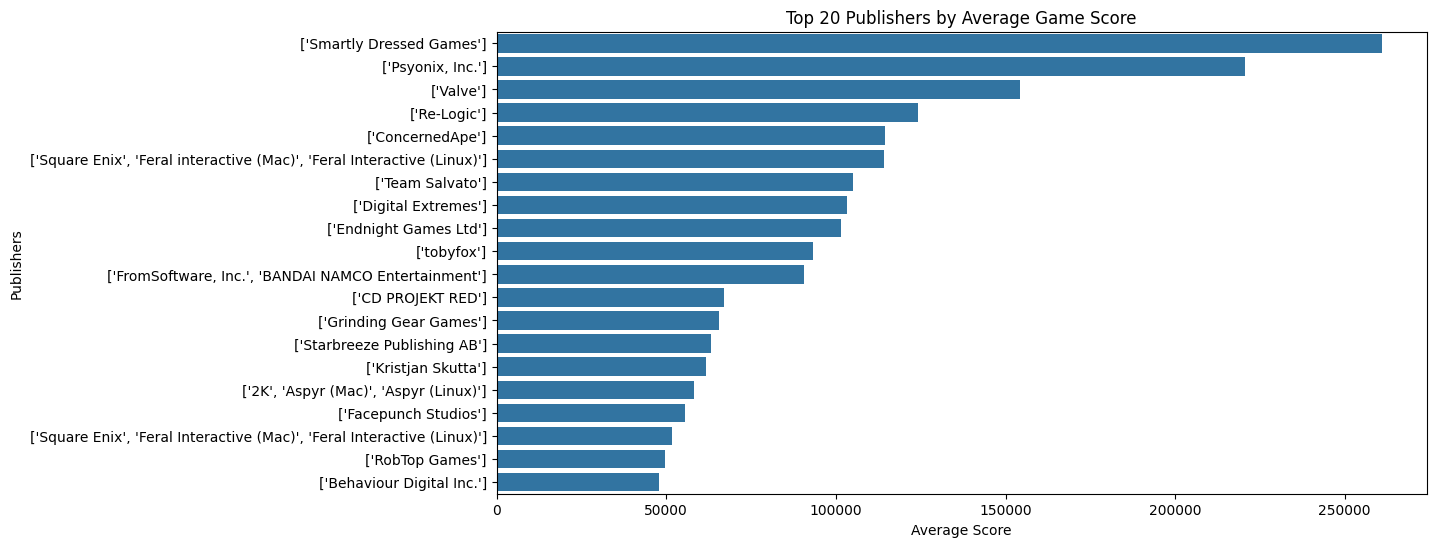

In [31]:
df_hh=df

# Assume df_hh is the original DataFrame containing 'publishers' and 'score' columns

# Step 1: Data Cleaning

# Remove rows where 'publishers' or 'score' is missing
df_filtered = df_hh.dropna(subset=['publishers', 'score'])

# Convert 'score' to numeric (in case there are non-numeric values)
df_filtered['score'] = pd.to_numeric(df_filtered['score'], errors='coerce')

# Remove rows with invalid scores (e.g., NaN values after conversion)
df_filtered = df_filtered.dropna(subset=['score'])

# Ensure 'publishers' column is stripped of any leading/trailing spaces and inconsistencies
df_filtered['publishers'] = df_filtered['publishers'].str.strip()

# Remove duplicates in case there are any repeated entries
df_filtered = df_filtered.drop_duplicates()

# Step 2: Data Aggregation and Grouping

# Group by 'publishers' and calculate the average score for each publisher
publisher_score_avg = df_filtered.groupby('publishers')['score'].mean().reset_index()

# Sort publishers by average score in descending order
publisher_score_avg = publisher_score_avg.sort_values(by='score', ascending=False)

# Step 3: Data Visualization

# Select the top 20 publishers by average score
top_publishers = publisher_score_avg.head(20)

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create a barplot using Seaborn to visualize top publishers by average score
sns.barplot(x='score', y='publishers', data=top_publishers)

# Add titles and labels for clarity
plt.title('Top 20 Publishers by Average Game Score')
plt.xlabel('Average Score')
plt.ylabel('Publishers')

# Display the plot
plt.show()


**Hypothesis 2:** Popular Publishers Have Higher Average Scores
Outcome and Learning:
This graph highlights which publishers produce higher-scoring games on average. If we find that certain publishers consistently score higher, this suggests that they have a better reputation or produce higher quality games.

**Conclusion :**

Through this exploratory data analysis, we have gathered insights regarding the relationship between publishers, developers, and game scores. The results from our EDA will help us make informed decisions about feature selection and engineering as we prepare our dataset for downstream modeling.

**In summary:**
Selected Features: Publishers and Developers (based on their average scores).
Dropped Features: Columns without substantial correlation to the target variable.
Future Work: Continue exploring other features that might influence scores and refine our dataset further.


**Neeraj Gummadi (50594025)**

Q1]Is there a significant difference in “score” between free games and paid games as indicated by the “price”?

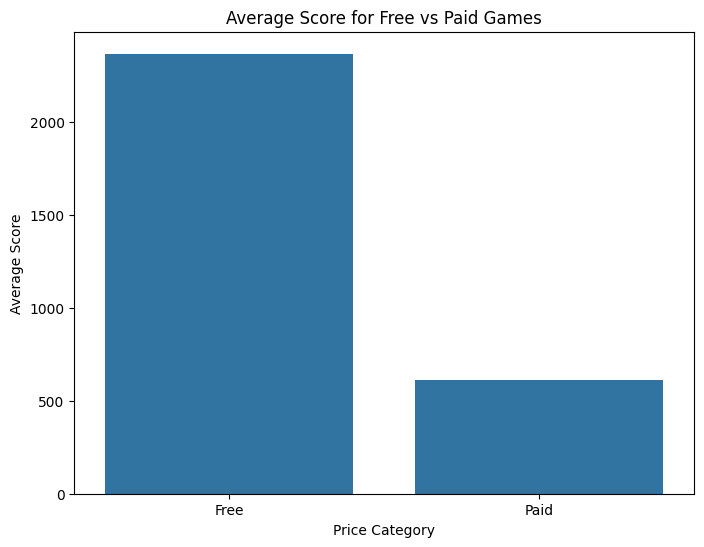

In [32]:

eda_one_df=df
eda_one_df.head(10)

eda_one_df['price_category'] = eda_one_df['price'].apply(lambda x: 'Free' if x == 0 else 'Paid')

price_score_avg = eda_one_df.groupby('price_category')['score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='price_category', y='score', data=price_score_avg)
plt.title('Average Score for Free vs Paid Games')
plt.xlabel('Price Category')
plt.ylabel('Average Score')
plt.show()



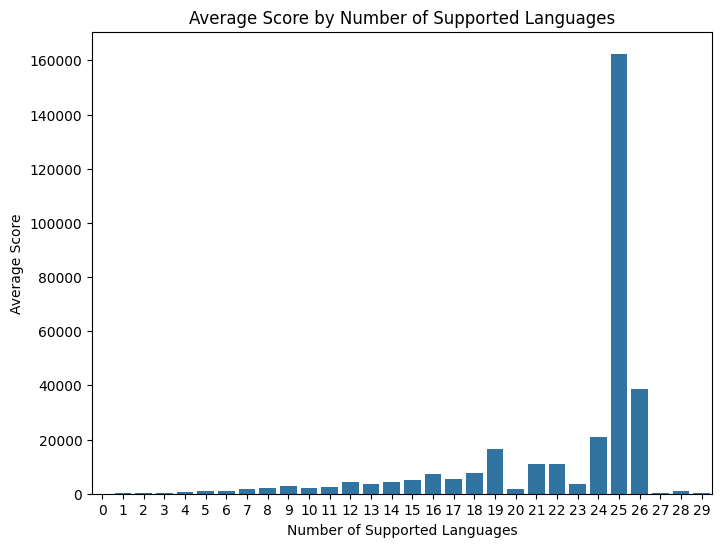

In [33]:
eda_two_df=df

# Count the number of supported languages for each game, handling missing values
def count_languages(supported_languages):
    if isinstance(supported_languages, str):
        return len(supported_languages.split(','))
    return 0  # Return 0 if the value is NaN or not a string

# Count the number of supported languages for each game
eda_two_df['language_count'] = eda_two_df['supported_languages'].apply(count_languages)

# Group by the number of supported languages and calculate the mean score
language_score_avg = eda_two_df.groupby('language_count')['score'].mean().reset_index()

# Plot a bar plot for the average score by language count
plt.figure(figsize=(8, 6))
sns.barplot(x='language_count', y='score', data=language_score_avg)
plt.title('Average Score by Number of Supported Languages')
plt.xlabel('Number of Supported Languages')
plt.ylabel('Average Score')
plt.show()

Hypothesis: Do games that support more languages receive higher review scores?

Data Preparation:
Created a new column, language_count, to count the number of supported languages for each game.

Hypothesis Testing:
Grouped data by language_count and calculated average review scores.
Visualized the relationship between language_count and average review score using a bar plot.

Findings:
The bar plot shows a positive trend, it suggests that games with more supported languages (25) tend to have higher review scores.


**Shashank Govindu (50594030)**

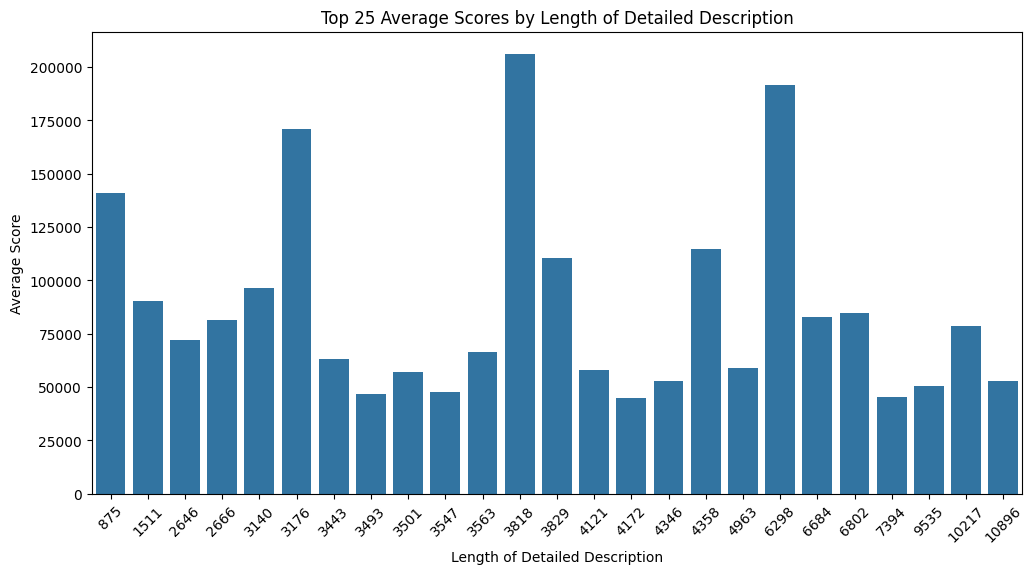

In [34]:
# df is cleaned DataFrame
eda_s_one = df.copy()  # Assign df to eda_s_one

# Fill NaN values in 'detailed_description' with an empty string
eda_s_one['detailed_description'] = eda_s_one['detailed_description'].fillna('')

# Calculate the length of the detailed description
eda_s_one['description_length'] = eda_s_one['detailed_description'].apply(len)

# Group by the length of the description and calculate the mean score
description_score_avg = eda_s_one.groupby('description_length')['score'].mean().reset_index()

# Sort by score in descending order and select the top 25 lengths with the highest average scores
top_25_description_scores = description_score_avg.sort_values(by='score', ascending=False).head(25)

# Plot a bar plot for the average score by description length for the top 25
plt.figure(figsize=(12, 6))
sns.barplot(x='description_length', y='score', data=top_25_description_scores)
plt.title('Top 25 Average Scores by Length of Detailed Description')
plt.xlabel('Length of Detailed Description')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()

Hypothesis: The length of the game's detailed description affects the review score.

To test this hypothesis:

1. Created a new column, description_length to measure the length of each game's description and the average review score was calculated for each group.
2. The top 25 description lengths with the highest average scores were selected for a detailed analysis.
3. A bar plot was created to visualize the relationship between the top 25 lengths of the detailed description and the average review score.

Findings:
While longer descriptions don't always guarantee higher reviews, there might be a sweet spot for the ideal length. This suggests that concise and clear descriptions can be more effective than overly long or short ones.

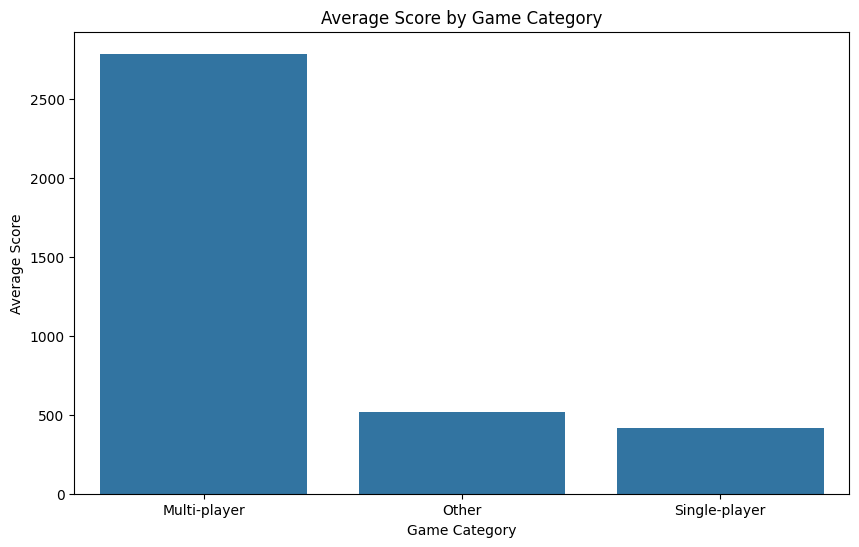

In [35]:

# df is cleaned DataFrame
eda_categories = df.copy()  # Assign df to eda_categories

# Fill NaN values in 'categories' with an empty string
eda_categories['categories'] = eda_categories['categories'].fillna('')

# Create a new column 'new_category' based on the presence of 'Multi-player' and 'Single-player'
def categorize_game(categories):
    if 'Multi-player' in categories:
        return 'Multi-player'
    elif 'Single-player' in categories:
        return 'Single-player'
    else:
        return 'Other'

# Apply the function to create the 'new_category' column
eda_categories['new_category'] = eda_categories['categories'].apply(categorize_game)


# Group by the new category and calculate the average score
category_score_avg = eda_categories.groupby('new_category')['score'].mean().reset_index()

# Plot a bar graph for average score by new category
plt.figure(figsize=(10, 6))
sns.barplot(x='new_category', y='score', data=category_score_avg)
plt.title('Average Score by Game Category')
plt.xlabel('Game Category')
plt.ylabel('Average Score')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.show()

Hypothesis: Game category ('Multi-player' vs 'Single-player') significantly affects the average review score.

To test this hypothesis:

1. Created a new column, new_category, to categorize games as 'Multi-player', 'Single-player', or 'Other'.
2. Calculated the average review score for each category.
3. A bar graph was plotted to visualize the difference in average scores for each game category.

Findings:
Multiplayer games tend to have higher average review scores than single-player games.
This suggests that multiplayer experiences may be more popular with players.